Import potrzebnych bibliotek

In [3]:
import pandas as pd #obsługa danych
import matplotlib.pyplot as plt #dodatkowe funkcje, customizacja
%matplotlib inline
import seaborn as sns #do wizualizacji i plotowania
from IPython.display import display

Pobieranie danych

In [4]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets
wine = pd.read_csv('ml-throwdown-datasets/wine.csv')
display(wine.head())

fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,one
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,one


Jedną z największych zalet Seaborn jest różnorodność funkcji kreślenia. Na przykład utworzenie wykresu punktowego to tylko jeden wiersz kodu przy użyciu funkcji lmplot ().

Można to zrobić na dwa sposoby.

- Pierwszym sposobem (zalecanym) jest przekazanie DataFrame do argumentu data =, przy jednoczesnym przekazaniu nazw kolumn do argumentów ax, x = i y =.
- Drugim sposobem jest bezpośrednie przekazanie szeregów danych do argumentów osi.



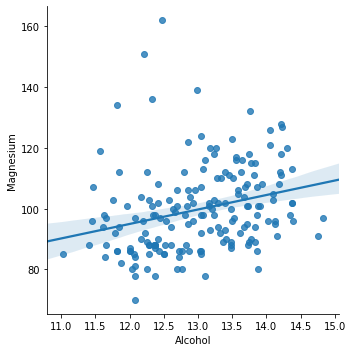

In [5]:

# Recommended way
sns.lmplot(x='Alcohol', y='Magnesium', data=wine)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Nawiasem mówiąc, Seaborn nie ma dedykowanej funkcji wykresu rozproszenia, dlatego widzisz linię ukośną. Właściwie użyliśmy funkcji Seaborn do dopasowania i wykreślenia linii regresji.

Na szczęście każda funkcja drukowania ma kilka przydatnych opcji, które można ustawić. Oto jak możemy ulepszyć lmplot ():

- Najpierw ustawimy fit_reg = False, aby usunąć linię regresji, ponieważ chcemy tylko wykresu rozproszenia.
- Następnie ustawimy hue = 'Stage', aby pokolorować nasze punkty etapem ewolucji Pokémon. Ten argument barwy jest bardzo przydatny, ponieważ pozwala wyrazić trzeci wymiar informacji za pomocą koloru.



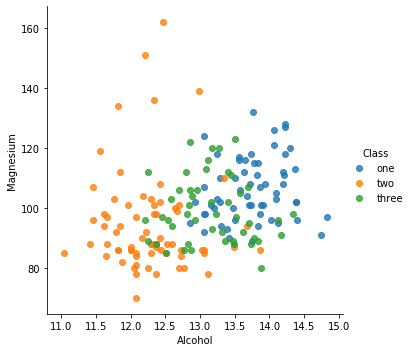

In [8]:
# Scatterplot arguments
sns.lmplot(x='Alcohol', y='Magnesium', data=wine,
           fit_reg=False, # No regression line
           hue='Class')   # Color by evolution stage

Wygląda lepiej, ale możemy jeszcze bardziej ulepszyć ten wykres rozproszenia.

Pamiętaj, Seaborn to interfejs wysokiego poziomu do Matplotlib. Z naszego doświadczenia wynika, że Seaborn zapewni ci większość drogi, ale czasami będziesz musiał sprowadzić Matplotlib.

Ustawienie limitów osi jest jednym z takich czasów, ale proces jest dość prosty:

- Najpierw uruchom normalną funkcję kreślenia Seaborn.
- Następnie wywołaj funkcje dostosowywania Matplotlib. W tym przypadku użyjemy jego funkcji ylim () i xlim ().

Oto nasz nowy wykres punktowy z rozsądnymi ograniczeniami osi:

(11, 14)

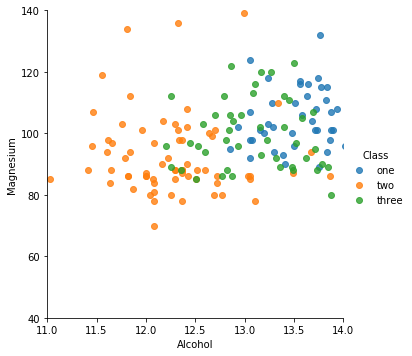

In [10]:
# Scatterplot arguments
sns.lmplot(x='Alcohol', y='Magnesium', data=wine,
           fit_reg=False, # No regression line
           hue='Class')   # Color by evolution stage

# Tweak using Matplotlib
plt.ylim(40, 140)
plt.xlim(11, 14)

Mimo że jest to samouczek Seaborn, Pandy w rzeczywistości odgrywają bardzo ważną rolę. Widzisz, funkcje drukowania Seaborn korzystają z bazowej ramki danych, która jest rozsądnie sformatowana.

Załóżmy na przykład, że chcieliśmy stworzyć fabułę pudełkową dla statystyk win:

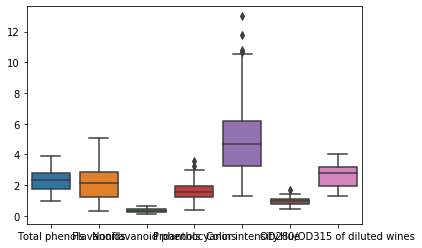

In [16]:
# Boxplot
sns.boxplot(data=wine.iloc[:,5:-2]) #zobaczcie co się stanie jak damy cały zakres danych

Kolejną zaletą Seaborn jest to, że ma gotowe motywy w przyzwoitym stylu. Domyślny motyw nazywa się „darkgrid”.

Następnie zmienimy motyw na „białą siatkę” podczas tworzenia fabuły skrzypiec.

- Wykresy skrzypcowe są przydatną alternatywą dla wykresów skrzynkowych.
- Pokazują rozkład (przez grubość skrzypiec) zamiast tylko statystyk podsumowujących.

Na przykład możemy wizualizować rozkład alkoholu według podstawowego typu wina:

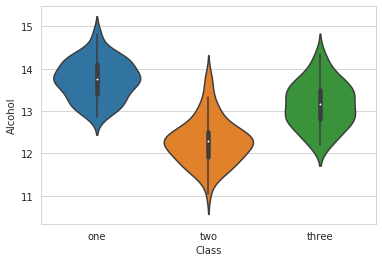

In [17]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Class', y='Alcohol', data=wine)

Wykresy skrzypcowe świetnie nadają się do wizualizacji dystrybucji. Ponieważ jednak w naszym zestawie danych znajduje się tylko 170 win, możemy po prostu wyświetlić każdy punkt.

Właśnie tam pojawia się wykres roju. Ta wizualizacja pokaże każdy punkt, a „ułożenie” tych o podobnych wartościach:



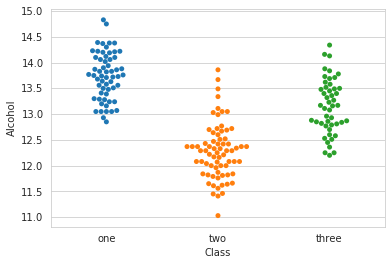

In [18]:
sns.swarmplot(x='Class', y='Alcohol', data=wine)

To przydatne, ale czy nie możemy połączyć naszego spisku z fabułą skrzypiec? W końcu wyświetlają podobne informacje, prawda?

Odpowiedź brzmi tak.

Nakładanie wykresów za pomocą Seaborn jest dość proste i działa tak samo, jak w przypadku Matplotlib. Oto, co zrobimy:

- Po pierwsze, powiększymy naszą figurę za pomocą Matplotlib.
- Następnie nakreślimy spisek skrzypcowy. Ustawimy jednak opcję Wewnętrzna = Brak, aby usunąć paski wewnątrz skrzypiec.
- Następnie nakreślimy spisek roju. Tym razem sprawimy, że punkty będą czarne, aby wyskoczyły bardziej.
- Na koniec ustawimy tytuł za pomocą Matplotlib.

Text(0.5, 1.0, 'Alkohol w zależności od typu wina')

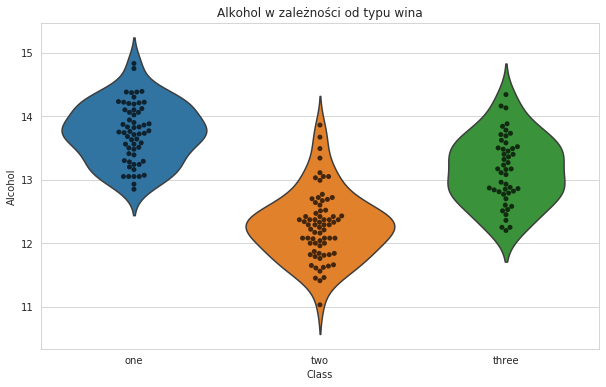

In [19]:

# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Class',
               y='Alcohol', 
               data=wine, 
               inner=None, # Remove the bars inside the violins
               )
 
sns.swarmplot(x='Class', 
              y='Alcohol', 
              data=wine, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Alkohol w zależności od typu wina')

Z pewnością moglibyśmy powtórzyć ten wykres dla każdej statystyki. Ale możemy też połączyć te informacje w jedną tabelę ... po prostu musimy wcześniej zrobić pewne dane z Pandas.

Jak widać, wszystkie nasze statystyki są w osobnych kolumnach. Zamiast tego chcemy je „stopić” w jedną kolumnę.

Aby to zrobić, użyjemy funkcji melt () Pandy. Wymaga 3 argumentów:

- Najpierw DataFrame do stopienia.
- Po drugie, zmienne ID, które należy zachować (Pandy stopią wszystkie pozostałe).
- Wreszcie nazwa nowej, stopionej zmiennej.

In [24]:
# Melt DataFrame
wine.pop('Proline')
melted_df = pd.melt(wine.iloc[:,5:], 
                    id_vars="Class", # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Class,Stat,value
0,one,Total phenols,2.80
1,one,Total phenols,2.65
2,one,Total phenols,2.80
3,one,Total phenols,3.85
4,one,Total phenols,2.80


In [25]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 3 columns):
Class    1246 non-null object
Stat     1246 non-null object
value    1246 non-null float64
dtypes: float64(1), object(2)
memory usage: 29.3+ KB


Teraz możemy zrobić swarmplot przy pomocy melted_df.

Ale tym razem ustawimy x = „Stat” i y = „wartość”, więc nasze roje są oddzielone stat.
Następnie ustawimy hue = 'Class', aby pokolorować nasze punkty według typu wina.



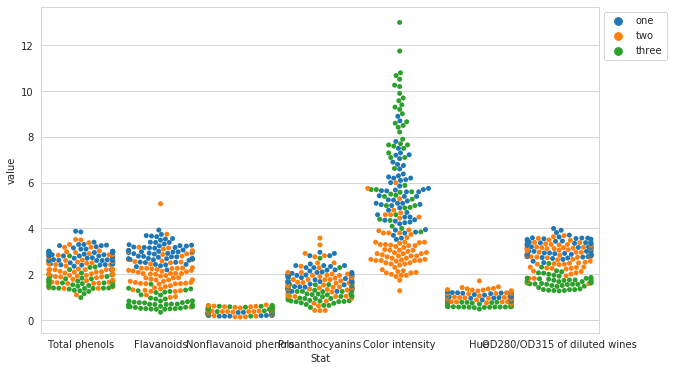

In [29]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Class')

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Inne przydatne wykresy

Mapa ciepła

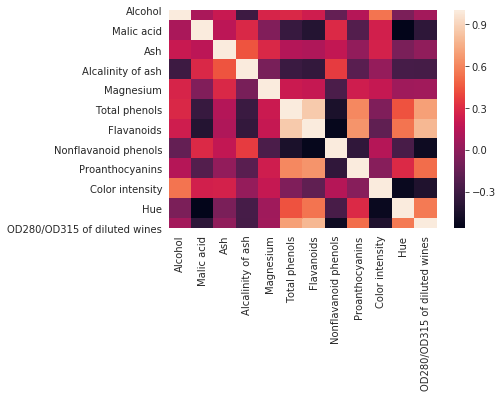

In [30]:

# Calculate correlations
corr = wine.corr()
 
# Heatmap
sns.heatmap(corr)

Histogram

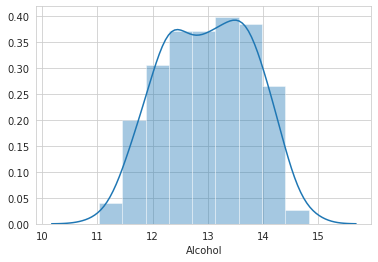

In [31]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(wine.Alcohol)

Count plot

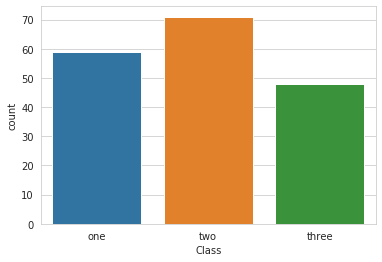

In [32]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Class', data=wine)

Density plot (rozkład gęstości)

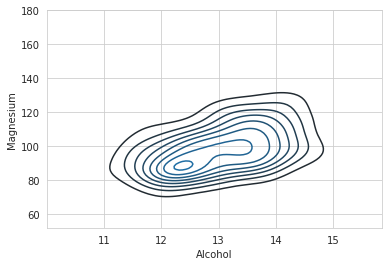

In [33]:
# Density Plot
sns.kdeplot(wine.Alcohol, wine.Magnesium)

Połączone wykresy dystrybucyjne łączą informacje z wykresów punktowych i histogramów, aby uzyskać szczegółowe informacje na temat rozkładów podwójnych.

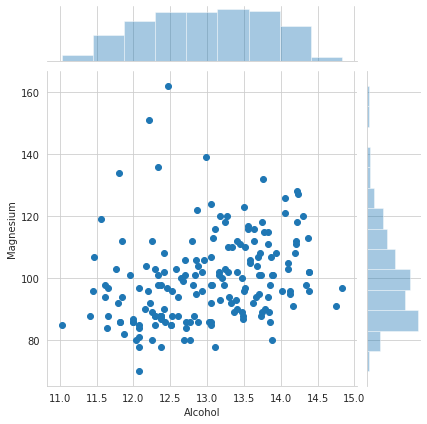

In [34]:
# Joint Distribution Plot
sns.jointplot(x='Alcohol', y='Magnesium', data=wine)

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


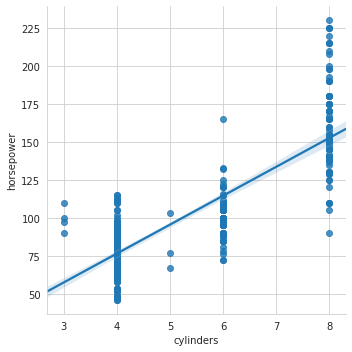

In [41]:
cars = pd.read_csv('ml-throwdown-datasets/auto_mpg.csv', na_values='?')
display(cars.head())
sns.lmplot(x='cylinders', y='horsepower', data=cars) #zależność cylindrów od mocy

In [46]:
melted_df = pd.melt(cars, 
                    id_vars=["cylinders", "origin"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,cylinders,origin,Stat,value
0,8,1,displacement,307.0
1,8,1,displacement,350.0
2,8,1,displacement,318.0
3,8,1,displacement,304.0
4,8,1,displacement,302.0


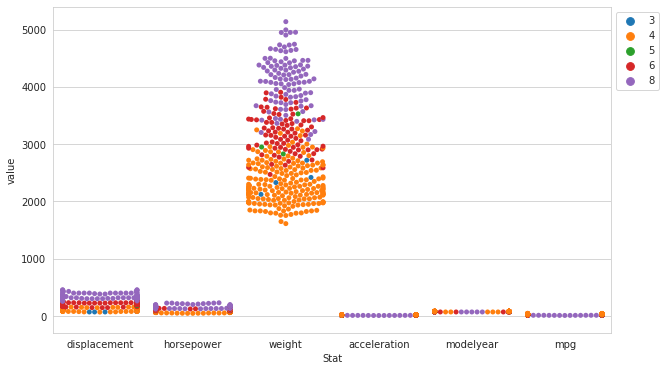

In [48]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue="cylinders") #lub origin

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)